# Utils

In [3]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

def plotSignal(signal=[], title='', xmin = 0, xmax = 0):
  if(xmax == 0):
    xmax = signal.size

  plt.title(title)
  plt.plot(signal)
  plt.xlim(xmin, xmax)
  plt.show() 


imgCol = cv2.imread('../Utils/LenaJPEG.jpg')
width, height, depth = imgCol.shape

# Praktikum 02

In [4]:
def getHistogramm(img=[]):
    histogram=np.zeros(256)
    
    for y in range(height):
        for x in range(width):
            if img.ndim == 3:
                i = 0.2125 * img[y][x][0] + 0.7154 * img[y][x][1] + 0.072 * img[y][x][2]
            else:
                i = img[y][x]

            histogram[int(i)] += 1

    return histogram

def getNormHistogramm(img=[]):
    return getHistogramm(img) / (width*height)

def getCumulatedHistogramm(img):
    H = np.zeros(256)
    h = getNormHistogramm(img)
    for i in range(len(h)):
        for j in range(i): 
            H[i] += h[j]
    return H

def linearContrast(img, t0, t1):
    toRet = np.zeros((height, width))
    for y in range(height):
        for x in range(width):
            a = 0.2125 * img[y][x][0] + 0.7154 * img[y][x][1] + 0.072 * img[y][x][2]
            if a < t0:
                toRet[y][x] = 0
            if t0 <= a < t1:
                toRet[y][x] = 255/(t1-t0) * (a-t0)
            if a >= t1:
                toRet[y][x] = 255
    return toRet

def autoContrast(img, schwellwert):
    a1_low = getPercentage(img, schwellwert)
    a1_high = getPercentage(img, 1-schwellwert)

    return linearContrast(img, a1_low, a1_high)

def getPercentage(img, schwellwert):
    H = getCumulatedHistogramm(img)
    for i in range(len(H)):
        if H[i] >= schwellwert:
            return i


def getMedianOfHistogramm(img):
    H = getCumulatedHistogramm(img)
    for i in range(len(H)):
        if H[i] >= 0.5:
            return getHistogramm(img)[i]


def getBinary(img=[], schwellwert=125):
    toRet = np.zeros((height, width))
    for y in range(height):
        for x in range(width):
            a = 0.2125 * img[y][x][0] + 0.7154 * img[y][x][1] + 0.072 * img[y][x][2]
            if a < schwellwert:
                toRet[y][x] = 0
            else:
                toRet[y][x] = 1
    return toRet

testing Praktikum 02

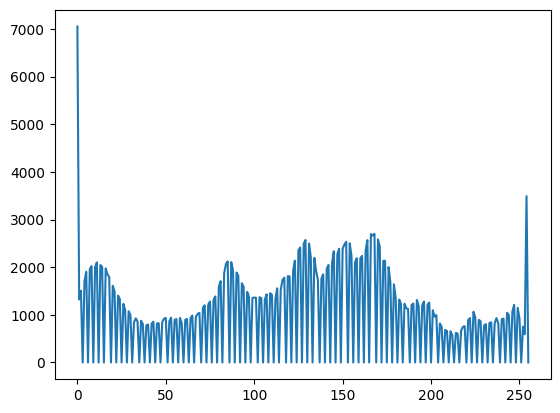

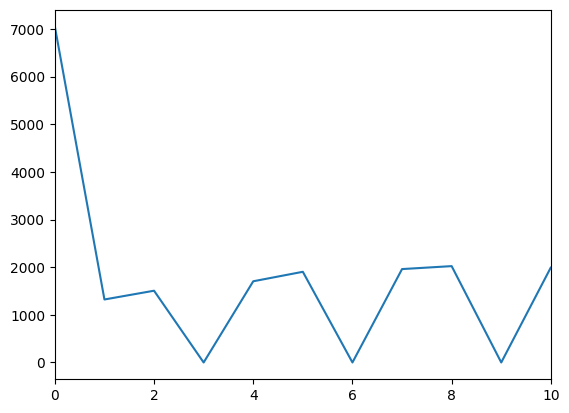

: 

In [6]:
# print(getMedianOfHistogramm(imgCol))

# plt.plot(getHistogramm(imgCol))
# plt.plot(getCumulatedHistogramm(imgCol))
# plt.show()

img_con = linearContrast(imgCol, 40, 215)
# img_autoCon = autoContrast(imgCol, 0.05)
# plt.plot(getHistogramm(imgCol))
plt.plot(getHistogramm(img_con))
# plt.plot(getHistogramm(img_autoCon))

# plt.plot(getHistogramm(img_autoCon))
plt.show()
plotSignal(getHistogramm(img_con), xmax = 10)

# cv2.imshow("img", getBinary(imgCol, 125))

cv2.imshow("img", img_con)
# # cv2.imshow("img", linearContrast(imgCol, 0, 255))
# cv2.waitKey(0)
# cv2.destroyAllWindows()